In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

# Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
Attribute Information

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


Source: fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
df.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.isna().sum()
# no NaN values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()
# no duplicated data

0

## Categorical Variables

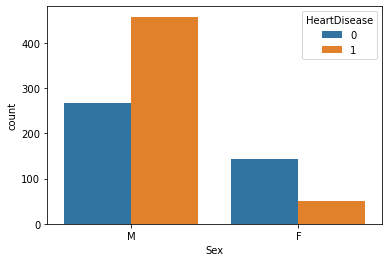

In [9]:
sns.countplot(data=df,
             x='Sex',
             hue='HeartDisease')
plt.show()

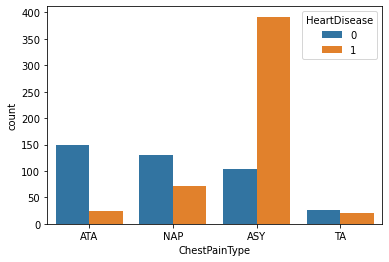

In [10]:
sns.countplot(data=df,
             x='ChestPainType',
             hue='HeartDisease')
plt.show()

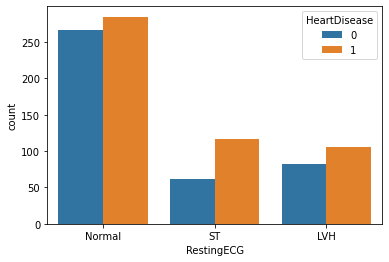

In [11]:
sns.countplot(data=df,
             x='RestingECG',
             hue='HeartDisease')
plt.show()

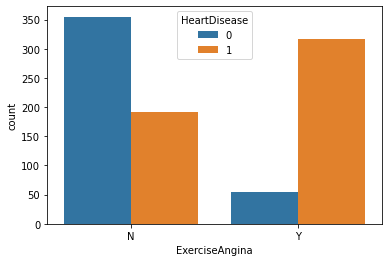

In [12]:
sns.countplot(data=df,
             x='ExerciseAngina',
             hue='HeartDisease')
plt.show()

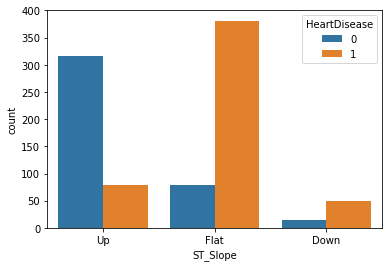

In [13]:
sns.countplot(data=df,
             x='ST_Slope',
             hue='HeartDisease')
plt.show()

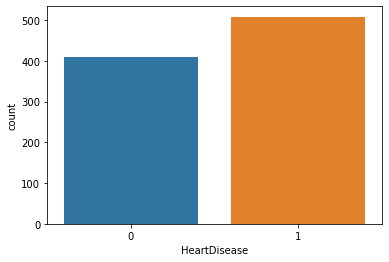

In [14]:
sns.countplot(data=df,
             x='HeartDisease')
plt.show()

## Numerical Variables

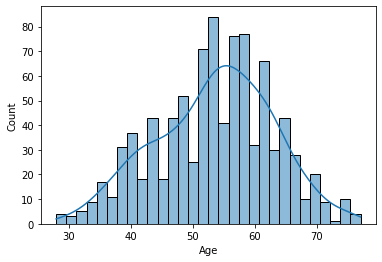

In [15]:
sns.histplot(data=df,
            x='Age',
            bins=30,
            kde=True)
plt.show()

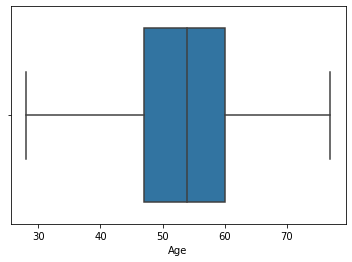

In [16]:
sns.boxplot(data=df,
           x='Age')
plt.show()

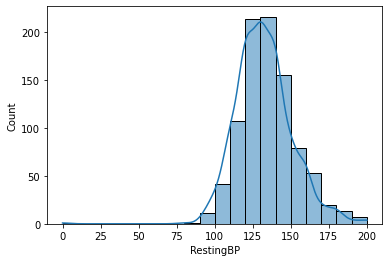

In [17]:
sns.histplot(data=df,
            x='RestingBP',
            bins=20,
            kde=True)
plt.show()

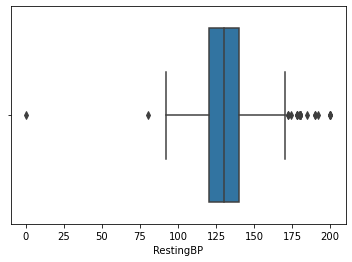

In [18]:
sns.boxplot(data=df,
           x='RestingBP')
plt.show()

In [19]:
display(df[df.RestingBP < 90])
df[df.RestingBP > 175]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


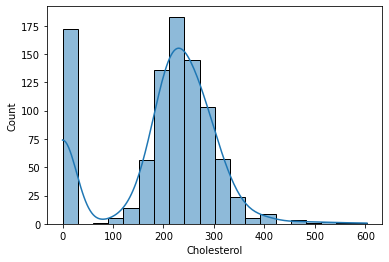

In [20]:
sns.histplot(data=df,
            x='Cholesterol',
            bins=20,
            kde=True)
plt.show()

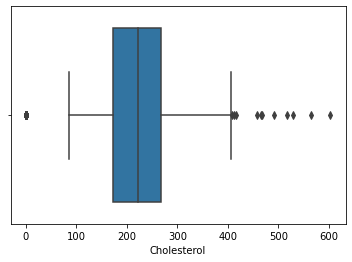

In [21]:
sns.boxplot(data=df,
           x='Cholesterol')
plt.show()

In [22]:
df[df.Cholesterol<70]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


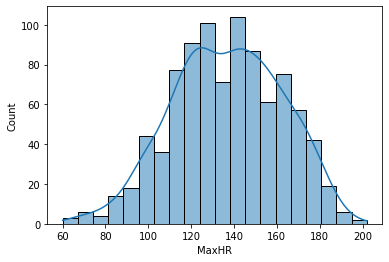

In [23]:
sns.histplot(data=df,
            x='MaxHR',
            bins=20,
            kde=True)
plt.show()

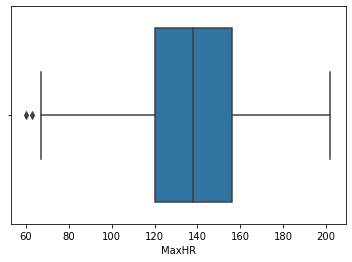

In [24]:
sns.boxplot(data=df,
           x='MaxHR')
plt.show()

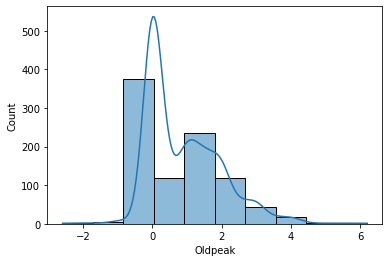

In [25]:
sns.histplot(data=df,
            x='Oldpeak',
            bins=10,
            kde=True)
plt.show()

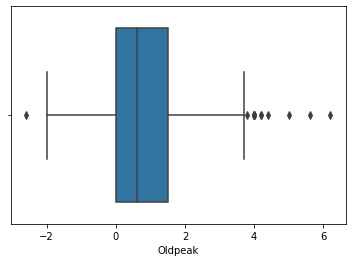

In [26]:
sns.boxplot(data=df,
           x='Oldpeak')
plt.show()

## Outlier Removal 

In [27]:
def add_to_list(lst_to_add, lst):
    for item in lst:
        if item in lst_to_add:
            continue
        else:
            lst_to_add.append(item)
    return lst_to_add

to_delete = []

restingbp = df.index[df.RestingBP < 90].tolist()
to_delete = add_to_list(to_delete, restingbp)

restingbp = df.index[df.RestingBP > 170].tolist()
to_delete = add_to_list(to_delete, restingbp)

In [28]:
cholesterol = df.index[df.Cholesterol > 400].tolist()
to_delete = add_to_list(to_delete, cholesterol)

In [29]:
maxhr = df.index[df.MaxHR < 70].tolist()
to_delete = add_to_list(to_delete, maxhr)

In [30]:
oldpeak = df.index[df.Oldpeak < -2].tolist()
to_delete = add_to_list(to_delete, oldpeak)

oldpeak = df.index[df.Oldpeak > 3.9].tolist()
to_delete = add_to_list(to_delete, oldpeak)

In [31]:
pct_del = len(to_delete)/len(df) * 100
print(f'{pct_del:.3}% of data will be removed.')
df = df.drop(to_delete)

6.1% of data will be removed.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             862 non-null    int64  
 1   Sex             862 non-null    object 
 2   ChestPainType   862 non-null    object 
 3   RestingBP       862 non-null    int64  
 4   Cholesterol     862 non-null    int64  
 5   FastingBS       862 non-null    int64  
 6   RestingECG      862 non-null    object 
 7   MaxHR           862 non-null    int64  
 8   ExerciseAngina  862 non-null    object 
 9   Oldpeak         862 non-null    float64
 10  ST_Slope        862 non-null    object 
 11  HeartDisease    862 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 87.5+ KB


## Dummy Variable Creation

In [33]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [34]:
sex = pd.get_dummies(df.Sex, drop_first=True)

chestPainType = pd.get_dummies(df.ChestPainType, drop_first=True)

restingECG = pd.get_dummies(df.RestingECG, drop_first=True)

exerciseAngina = pd.get_dummies(df.ExerciseAngina, drop_first=True)

st_slope = pd.get_dummies(df.ST_Slope, drop_first=True)

In [35]:
df = pd.concat([df, sex, chestPainType, restingECG, exerciseAngina, st_slope], axis=1)

In [36]:
df = df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)

In [37]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


## Correlation with Heart Disease Presence

<AxesSubplot:>

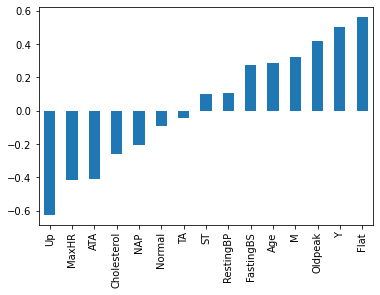

In [38]:
df.corr().HeartDisease.sort_values()[:-1].plot(kind='bar')

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = PowerTransformer()

In [41]:
X = df.drop('HeartDisease', axis=1).values
y = df.HeartDisease.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, stratify=y)

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()

In [45]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [46]:
log_predictions = logmodel.predict(X_test)

In [47]:
log_score = accuracy_score(y_test, log_predictions)
print(f'Accuracy: {log_score:.3}')
print('\n')
print(confusion_matrix(y_test, log_predictions))
print('\n')
print(classification_report(y_test, log_predictions))

Accuracy: 0.876


[[102  17]
 [ 15 125]]


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       119
           1       0.88      0.89      0.89       140

    accuracy                           0.88       259
   macro avg       0.88      0.88      0.88       259
weighted avg       0.88      0.88      0.88       259



## K Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

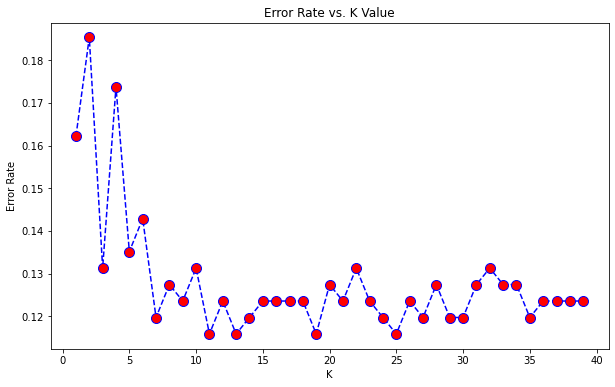

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         error_rate,
         color='blue',
         linestyle='dashed',
        marker='o',
        markerfacecolor='red',
        markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [52]:
knn_score = accuracy_score(y_test, pred_knn)
print(f'accuracy: {knn_score}')
print('\n')
print(confusion_matrix(y_test, pred_knn))
print('\n')
print(classification_report(y_test, pred_knn))

accuracy: 0.8803088803088803


[[106  13]
 [ 18 122]]


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       119
           1       0.90      0.87      0.89       140

    accuracy                           0.88       259
   macro avg       0.88      0.88      0.88       259
weighted avg       0.88      0.88      0.88       259



## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier()

In [55]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [56]:
rfc_score = accuracy_score(y_test, pred_rfc)
print(f'accuracy: {rfc_score}')
print('\n')
print(confusion_matrix(y_test, pred_rfc))
print('\n')
print(classification_report(y_test, pred_rfc))

accuracy: 0.8996138996138996


[[105  14]
 [ 12 128]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       119
           1       0.90      0.91      0.91       140

    accuracy                           0.90       259
   macro avg       0.90      0.90      0.90       259
weighted avg       0.90      0.90      0.90       259



## Support Vector Machine

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC()

In [59]:
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
svc_score = accuracy_score(y_test, pred_svc)

In [60]:
print(f'accuracy: {svc_score}')
print('\n')
print(confusion_matrix(y_test, pred_svc))
print('\n')
print(classification_report(y_test, pred_svc))

accuracy: 0.8841698841698842


[[103  16]
 [ 14 126]]


              precision    recall  f1-score   support

           0       0.88      0.87      0.87       119
           1       0.89      0.90      0.89       140

    accuracy                           0.88       259
   macro avg       0.88      0.88      0.88       259
weighted avg       0.88      0.88      0.88       259



## Neural Network

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

import time

In [62]:
X_train.shape

(603, 15)

In [63]:
X_train

array([[0.6875    , 0.51315789, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.47916667, 0.86842105, 0.84010152, ..., 1.        , 1.        ,
        0.        ],
       [0.60416667, 0.55263158, 0.51522843, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.41666667, 0.21052632, 0.52791878, ..., 0.        , 0.        ,
        1.        ],
       [0.6875    , 0.34210526, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.27631579, 0.65989848, ..., 0.        , 0.        ,
        1.        ]])

In [64]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=8, verbose=1)

In [65]:
# dense_layers = [0, 1, 2,]
# layer_sizes = [7, 15, 22]

# for dense_layer in dense_layers:
#     for layer_size in layer_sizes:

#         NAME = f'{dense_layer}-dense-{layer_size}-nodes-oldpeak-removal-{int(time.time())}'
#         tensorboard = TensorBoard(log_dir=f'logs\\fit\\{NAME}')

#         model = Sequential()

#         model.add(Dense(15, activation='relu'))

#         for l in range(dense_layer):
#             model.add(Dense(layer_size, activation='relu'))

# #         model.add(Dropout(0.1))
#         model.add(Dense(1, activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
#         model.fit(X_train, y_train, epochs=250, validation_data=(X_test, y_test),
#                   callbacks=[tensorboard, early_stop])

In [139]:
model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# 87% accuracy

In [140]:
model.fit(x=X_train, y=y_train, batch_size=32, epochs=250, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/250
19/19 [==============================] - 1s 8ms/step - loss: 0.6914 - val_loss: 0.6509
Epoch 2/250
19/19 [==============================] - 0s 3ms/step - loss: 0.6362 - val_loss: 0.6035
Epoch 3/250
19/19 [==============================] - 0s 3ms/step - loss: 0.5910 - val_loss: 0.5564
Epoch 4/250
19/19 [==============================] - 0s 3ms/step - loss: 0.5466 - val_loss: 0.5126
Epoch 5/250
19/19 [==============================] - ETA: 0s - loss: 0.548 - 0s 3ms/step - loss: 0.5052 - val_loss: 0.4713
Epoch 6/250
19/19 [==============================] - 0s 3ms/step - loss: 0.4672 - val_loss: 0.4363
Epoch 7/250
19/19 [==============================] - 0s 3ms/step - loss: 0.4361 - val_loss: 0.4073
Epoch 8/250
19/19 [==============================] - 0s 3ms/step - loss: 0.4120 - val_loss: 0.3855
Epoch 9/250
19/19 [==============================] - 0s 3ms/step - loss: 0.3924 - val_loss: 0.3690
Epoch 10/250
19/19 [==============================] - 0s 3ms/step - loss: 0.3796 - va

In [141]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

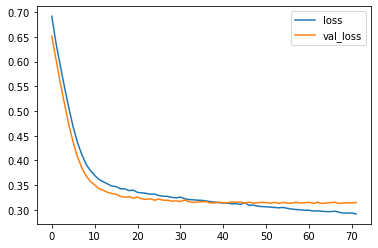

In [142]:
losses.plot()

In [143]:
predictions = model.predict(X_test).round().astype('int')

In [144]:
ann_score = accuracy_score(y_test, predictions)
print(f'Accuracy: {ann_score:.3}')
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

Accuracy: 0.88


[[104  15]
 [ 16 124]]


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.89      0.89      0.89       140

    accuracy                           0.88       259
   macro avg       0.88      0.88      0.88       259
weighted avg       0.88      0.88      0.88       259



# Summary

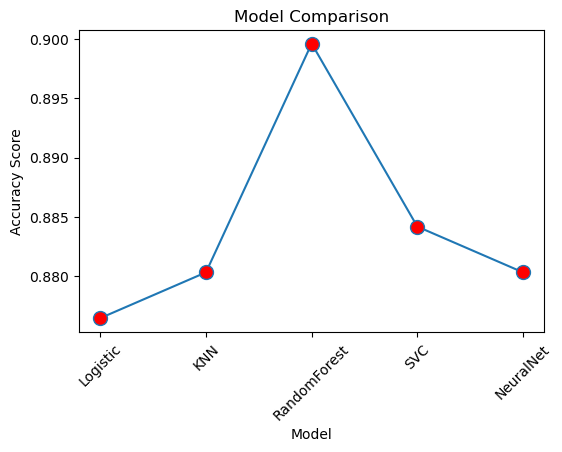

In [145]:
ml = ['Logistic', 'KNN', 'RandomForest', 'SVC', 'NeuralNet']
scores = [log_score, knn_score, rfc_score, svc_score, ann_score]

plt.figure(dpi=100)
plt.xticks(rotation=45)
plt.plot(ml,
        scores,
        marker='o',
        markerfacecolor='red',
        markersize=10)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()

Random Forest Classifier yielded a 90% accuracy rate for the detection of heart disease according to this dataset, the highest among all the models tested. Support Vector Model came in a close second with 88.4% accuracy.

In [76]:
# import joblib
# joblib.dump(rfc, 'heart_disease_prediction_rfc.joblib')

# loaded_rfc = joblib.load('heart_disease_prediction_rfc.joblib')